<a href="https://colab.research.google.com/github/zum-m/jouhougakugairon/blob/main/Copy_of_%E7%AC%AC8%E5%9B%9E_HTML%E3%81%A8CSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HTMLとCSS その2 要素の指定方法（セレクタ）・ページレイアウト方法
## 本日の概要

前回はHTMLとCSSの連携について学びました。今回はCSSの記述のルールについて学んでいきます。さらに、CSSで可能なページのレイアウトについて話を進めます。
まず最初はtable（表）の修飾について学んでおきます。他の要素はボックスの組わせがわかれれば大丈夫ですが、tableには独特のルールがあります。tableをページのレイアウトに使うことはなくなりましたが、規則正しい並びを表示するためにtableの役割は大きいです。

第2回の本題はセレクタです。セレクタは対象となる要素の選択にありますが、いろいろな選択手段が用意されています。また、指定方法も１つではなくいろいろな戦略があるのかと思えます。代表的なセレクタの利用方法を学びます。
セレクタによる対象の選択ができるようになったところで、画面のレイアウトについて学びます。これもさまざまな戦略があります。今回はごくごく一般的でよく見かけるページのレイアウトについて実践をしてみます。

## CSSリファレンスページのサイト紹介
CSSの機能はたいへん豊富です。本格的なページを作成ためには、辞書となるリファレンスは必須です。簡単に検索可能なサイトを紹介しておきます。機能を調べる時の参考にしてください。

1. 「MDN web docs：CSS: カスケーディングスタイルシート」 https://developer.mozilla.org/ja/docs/Web/CSS  
1. 「CSS Reference - W3Schools」 https://www.w3schools.com/cssref/
1. 「HTMLクイックリファレンス」http://www.htmq.com/css3/
1. 「CSS3の日本語訳集」http://momdo.s35.xrea.com/web-html-test/CSS3-ja/index.html





---



# 2-1 表の修飾 -- Tableの考え方

**表（table）**は２次元に規則的に並ぶ要素を表現する場合に利用します。日本的感覚ですと表はまず罫線が規則正しく引いてマスを作り、そこに記述をしていくというイメージで罫線がメインといったイメージですが、HTMLも表計算ソフトもまず２次元に規則的にならぶ**領域（セル）**があり、そのセルの外側に**ボーダー（枠線）**があるという考え方のようです。

**td要素**または**th要素**というセル（マス）を表現する要素があり、それが横に**tr要素**の中に並べられる 。これが上から順に並んでいるという考え方になります。したがって罫線を引く場合はtable要素でもなく、tr要素でもなく、td要素またはth要素が対象になります。

HTML5以降の表はやや複雑で、**caption**, **colgroup**, **thead**, **tbody**, **tfoot** といった表の内容の意味付けが強化されています。今回はCSSによる修飾が主目的なので説明は割愛します。table内の要素については、HTML5以降ではtfootをtbodyの前に書くことができましたが、現在のHTMLの仕様ではそれはできないようになっていたり、若干の仕様の変更があるようです。詳細については各自調べてみてください。
```
<table>
    <caption>表のタイトル</caption>
    <colgroup>
         列のグループ定義
    </colgroup>
    <thead>
         ヘッダの行グループ
    </thead>
    <tbody>
         本体の行グループ
    </tbody>
    <tfoot>
         フッタの行グループ
    </tfoot>
</table>
```
それぞれの要素以下のようなルールになっているので、最もシンプルな表は１つの行グループ（\<tr>...\</tr>）があればいいことになります。  
1.  任意の 1 個の \<caption> 要素
1.  0 個以上の \<colgroup> 要素
1.  任意の 1 個の \<thead> 要素
1.  次の 2 つの選択肢から 1 つ:  
  - 0 個以上の \<tbody> 要素
  - 1 個以上の \<tr> 要素  
1. 任意の 1 個の \<tfoot> 要素

行グループが表の内容になります。thは見出し用、tdは一般的な内容ということです。縦の見出し用としてでなく行の見出し用として用いることができます。
```
<tr>
   <th>見出しセル1-1</th><th>見出しセル1-2</th>...<th>見出しセル1-n</th>
<tr>
<tr>
   <td>本体セル2-1</td><td>本体セル2-2</td>...<td>本体セル2-n</td>
<tr>
<tr>
   <td>本体セル3-1</td><td>本体セル3-2</td>...<td>本体セル3-n</td>
<tr>
                                                    :
<tr>
   <td>本体セルm-1</td><td>本体セルm-2</td>...<td>本体セルm-n</td>
<tr>
```

## 表の修飾
以前はHTMLの機能の中に罫線や余白の設定がありましたが、現在は非推奨機能となっています。表の体裁はすべてCSSで指定することができます。表のすべての機能を扱うとデータ複雑になりますので、thead, tbody, tfootといった要素は省略をして単純化してCSS中心に話を進めます。

表の例として、最初にこの資料の中で利用したCSSの代表的なプロパティの表を例に用います。ここではtable要素のみを扱いますが、実際には必要な要素を追加してHTMLデータを作成し表示します。

```
<table>
  <tr><th>プロパティ名</th><th>用途・コメント</th><th>使用例</th></tr>
  <tr><td>font-family</td><td>フォントの種類をフォント名もしくはキーワードで指定、カンマで複数の候補を指定可能</td><td>font-family: 'Times New Roman', sans-serif;<br>font-family: Arial;</td></tr>
  <tr><td>font-size</td><td>px（ピクセル）、pt（ポイント）などの絶対値や、em（フォントの高さを１とする単位）などでサイズを指定</td><td>font-size: 12px;<br>font-size: 1.5em;<br>font-size: large;</td></tr>
  <tr><td>font-style</td><td>normal（通常）、italic（イタリック体）などフォントのスタイルを指定</td><td>font-style: italic;<br>font-style: normal;</td></tr>
  <tr><td>text-align</td><td>left（左寄せ）、right（右寄せ）、center（中央揃え）、justify（均等割り付け）など文字の位置や割り付けを指定</td><td>text-align: center;<br>text-align: right;</td></tr>
  <tr><td>line-height</td><td>行の高さを指定</td><td>line-height: 22px;<br>line-height: 2em</td></tr>
  <tr><td>color</td><td>前景色の指定</td><td>color: red;<br>color: #FF353A;</td></tr>
  <tr><td>background-color</td><td>背景色の指定</td><td>background-color: blue;<br><background-color: #0066A0;</td></tr>
  <tr><td>opacity</td><td>半透明度合いを0~1の範囲で指定</td><td>opacity: 0.6</td></tr>
  <tr><td>box-shadow</td><td>矩形に影をつける効果を演出。影は4つの値（右方向のずらし、下方向のずらし、ぼかし具合、影の色）で指定</td><td>box-shadow: 10px 10px 10px rgba(0,0,0,0.4);</td></tr>
</table>
```

In [ ]:
%%HTML
<table>
  <tr><th>プロパティ名</th><th>用途・コメント</th><th>使用例</th></tr>
  <tr><td>font-family</td><td>フォントの種類をフォント名もしくはキーワードで指定、カンマで複数の候補を指定可能</td><td>font-family: 'Times New Roman', sans-serif;<br>font-family: Arial;</td></tr>
  <tr><td>font-size</td><td>px（ピクセル）、pt（ポイント）などの絶対値や、em（フォントの高さを１とする単位）などでサイズを指定</td><td>font-size: 12px;<br>font-size: 1.5em;<br>font-size: large;</td></tr>
  <tr><td>font-style</td><td>normal（通常）、italic（イタリック体）などフォントのスタイルを指定</td><td>font-style: italic;<br>font-style: normal;</td></tr>
  <tr><td>text-align</td><td>left（左寄せ）、right（右寄せ）、center（中央揃え）、justify（均等割り付け）など文字の位置や割り付けを指定</td><td>text-align: center;<br>text-align: right;</td></tr>
  <tr><td>line-height</td><td>行の高さを指定</td><td>line-height: 22px;<br>line-height: 2em</td></tr>
  <tr><td>color</td><td>前景色の指定</td><td>color: red;<br>color: #FF353A;</td></tr>
  <tr><td>background-color</td><td>背景色の指定</td><td>background-color: blue;<br><background-color: #0066A0;</td></tr>
  <tr><td>opacity</td><td>半透明度合いを0~1の範囲で指定</td><td>opacity: 0.6</td></tr>
  <tr><td>box-shadow</td><td>矩形に影をつける効果を演出。影は4つの値（右方向のずらし、下方向のずらし、ぼかし具合、影の色）で指定</td><td>box-shadow: 10px 10px 10px rgba(0,0,0,0.4);</td></tr>
</table>

プロパティ名,用途・コメント,使用例
font-family,フォントの種類をフォント名もしくはキーワードで指定、カンマで複数の候補を指定可能,"font-family: 'Times New Roman', sans-serif;font-family: Arial;"
font-size,px（ピクセル）、pt（ポイント）などの絶対値や、em（フォントの高さを１とする単位）などでサイズを指定,font-size: 12px;font-size: 1.5em;font-size: large;
font-style,normal（通常）、italic（イタリック体）などフォントのスタイルを指定,font-style: italic;font-style: normal;
text-align,left（左寄せ）、right（右寄せ）、center（中央揃え）、justify（均等割り付け）など文字の位置や割り付けを指定,text-align: center;text-align: right;
line-height,行の高さを指定,line-height: 22px;line-height: 2em
color,前景色の指定,color: red;color: #FF353A;
background-color,背景色の指定,background-color: blue;<background-color: #0066A0;
opacity,半透明度合いを0~1の範囲で指定,opacity: 0.6
box-shadow,矩形に影をつける効果を演出。影は4つの値（右方向のずらし、下方向のずらし、ぼかし具合、影の色）で指定,"box-shadow: 10px 10px 10px rgba(0,0,0,0.4);"


罫線を表示させてみます。最初に書いたとおり罫線はtd, th要素に対して指定します。table要素もtr要素も関係ありません。セレクタに複数の要素を指定するには","で並べます。
```
td, th {
    border: solid 2px black;
}
```
注：tableもセレクタに含めれば、一番外側にも枠がつきます。
```
table, td, th {
    border: solid 2px black;
}
```

In [ ]:
%%HTML
<style>
body {
    width: 70%;
}
td, th {
    border: solid 2px black;  /* 枠線をつけてみる */
}
</style>
<table>
  <tr><th>プロパティ名</th><th>用途・コメント</th><th>使用例</th></tr>
  <tr><td>font-family</td><td>フォントの種類をフォント名もしくはキーワードで指定、カンマで複数の候補を指定可能</td><td>font-family: 'Times New Roman', sans-serif;<br>font-family: Arial;</td></tr>
  <tr><td>font-size</td><td>px（ピクセル）、pt（ポイント）などの絶対値や、em（フォントの高さを１とする単位）などでサイズを指定</td><td>font-size: 12px;<br>font-size: 1.5em;<br>font-size: large;</td></tr>
  <tr><td>font-style</td><td>normal（通常）、italic（イタリック体）などフォントのスタイルを指定</td><td>font-style: italic;<br>font-style: normal;</td></tr>
  <tr><td>text-align</td><td>left（左寄せ）、right（右寄せ）、center（中央揃え）、justify（均等割り付け）など文字の位置や割り付けを指定</td><td>text-align: center;<br>text-align: right;</td></tr>
  <tr><td>line-height</td><td>行の高さを指定</td><td>line-height: 22px;<br>line-height: 2em</td></tr>
  <tr><td>color</td><td>前景色の指定</td><td>color: red;<br>color: #FF353A;</td></tr>
  <tr><td>background-color</td><td>背景色の指定</td><td>background-color: blue;<br><background-color: #0066A0;</td></tr>
  <tr><td>opacity</td><td>半透明度合いを0~1の範囲で指定</td><td>opacity: 0.6</td></tr>
  <tr><td>box-shadow</td><td>矩形に影をつける効果を演出。影は4つの値（右方向のずらし、下方向のずらし、ぼかし具合、影の色）で指定</td><td>box-shadow: 10px 10px 10px rgba(0,0,0,0.4);</td></tr>
</table>

プロパティ名,用途・コメント,使用例
font-family,フォントの種類をフォント名もしくはキーワードで指定、カンマで複数の候補を指定可能,"font-family: 'Times New Roman', sans-serif;font-family: Arial;"
font-size,px（ピクセル）、pt（ポイント）などの絶対値や、em（フォントの高さを１とする単位）などでサイズを指定,font-size: 12px;font-size: 1.5em;font-size: large;
font-style,normal（通常）、italic（イタリック体）などフォントのスタイルを指定,font-style: italic;font-style: normal;
text-align,left（左寄せ）、right（右寄せ）、center（中央揃え）、justify（均等割り付け）など文字の位置や割り付けを指定,text-align: center;text-align: right;
line-height,行の高さを指定,line-height: 22px;line-height: 2em
color,前景色の指定,color: red;color: #FF353A;
background-color,背景色の指定,background-color: blue;<background-color: #0066A0;
opacity,半透明度合いを0~1の範囲で指定,opacity: 0.6
box-shadow,矩形に影をつける効果を演出。影は4つの値（右方向のずらし、下方向のずらし、ぼかし具合、影の色）で指定,"box-shadow: 10px 10px 10px rgba(0,0,0,0.4);"


セルとセルの間に隙間ができていますね。これは一般的な表の見栄えではありません。tableのデフォルトの表示スタイル（border-collapse）がこのようなseparateスタイルであるためです。
```
table {
    border-collapse: collapse;
}
```
これで一般的な表のスタイルになったと思います。

In [ ]:
%%HTML
<style>
body {
    width: 70%;
}
table {
    border-collapse: collapse;  /* 枠線を結合し境界線にする */
}
td, th {
    border: solid 2px black;
}
</style>
<table>
  <tr><th>プロパティ名</th><th>用途・コメント</th><th>使用例</th></tr>
  <tr><td>font-family</td><td>フォントの種類をフォント名もしくはキーワードで指定、カンマで複数の候補を指定可能</td><td>font-family: 'Times New Roman', sans-serif;<br>font-family: Arial;</td></tr>
  <tr><td>font-size</td><td>px（ピクセル）、pt（ポイント）などの絶対値や、em（フォントの高さを１とする単位）などでサイズを指定</td><td>font-size: 12px;<br>font-size: 1.5em;<br>font-size: large;</td></tr>
  <tr><td>font-style</td><td>normal（通常）、italic（イタリック体）などフォントのスタイルを指定</td><td>font-style: italic;<br>font-style: normal;</td></tr>
  <tr><td>text-align</td><td>left（左寄せ）、right（右寄せ）、center（中央揃え）、justify（均等割り付け）など文字の位置や割り付けを指定</td><td>text-align: center;<br>text-align: right;</td></tr>
  <tr><td>line-height</td><td>行の高さを指定</td><td>line-height: 22px;<br>line-height: 2em</td></tr>
  <tr><td>color</td><td>前景色の指定</td><td>color: red;<br>color: #FF353A;</td></tr>
  <tr><td>background-color</td><td>背景色の指定</td><td>background-color: blue;<br><background-color: #0066A0;</td></tr>
  <tr><td>opacity</td><td>半透明度合いを0~1の範囲で指定</td><td>opacity: 0.6</td></tr>
  <tr><td>box-shadow</td><td>矩形に影をつける効果を演出。影は4つの値（右方向のずらし、下方向のずらし、ぼかし具合、影の色）で指定</td><td>box-shadow: 10px 10px 10px rgba(0,0,0,0.4);</td></tr>
</table>

プロパティ名,用途・コメント,使用例
font-family,フォントの種類をフォント名もしくはキーワードで指定、カンマで複数の候補を指定可能,"font-family: 'Times New Roman', sans-serif;font-family: Arial;"
font-size,px（ピクセル）、pt（ポイント）などの絶対値や、em（フォントの高さを１とする単位）などでサイズを指定,font-size: 12px;font-size: 1.5em;font-size: large;
font-style,normal（通常）、italic（イタリック体）などフォントのスタイルを指定,font-style: italic;font-style: normal;
text-align,left（左寄せ）、right（右寄せ）、center（中央揃え）、justify（均等割り付け）など文字の位置や割り付けを指定,text-align: center;text-align: right;
line-height,行の高さを指定,line-height: 22px;line-height: 2em
color,前景色の指定,color: red;color: #FF353A;
background-color,背景色の指定,background-color: blue;<background-color: #0066A0;
opacity,半透明度合いを0~1の範囲で指定,opacity: 0.6
box-shadow,矩形に影をつける効果を演出。影は4つの値（右方向のずらし、下方向のずらし、ぼかし具合、影の色）で指定,"box-shadow: 10px 10px 10px rgba(0,0,0,0.4);"


もう少し体裁を整えてみます。
```
table {
    border-collapse: collapse;
}
td, th {
    border: solid 2px black;
    padding: 5px;
}
th {
    background-color: black;
    color: white;
}
th:first-child {
    width: 25%;
}
```
まず、見出しの部分の色を白黒逆転させました。セルの内部に余白を5pxに指定して余裕をもたせ、プロパティ名の列の比率を全体の25%程度に指定をして、改行されずに表示されるようにしています。ここで特徴的なのはth:first-childという修飾だと思います。複数あるthの最初の要素だけ対象にするという修飾です。セレクタの指定にはさまざま機能がありますので、この後はそれらを紹介します。

In [ ]:
%%HTML
<style>
body {
    width: 70%;
}
table {
    border-collapse: collapse;
}
td, th {
    border: solid 2px black;
    padding: 5px;  /* 枠線との間を広くして見やすく */
}
th {
    background-color: black;  /* 見出しは背景を黒く */
    color: white;             /* 文字は白く反転 */
}
th:first-child {              /* 左から１番目の要素を指定 */
    width: 25%;               /* セル幅の指定 */
}
</style>

<table>
  <tr><th>プロパティ名</th><th>用途・コメント</th><th>使用例</th></tr>
  <tr><td>font-family</td><td>フォントの種類をフォント名もしくはキーワードで指定、カンマで複数の候補を指定可能</td><td>font-family: 'Times New Roman', sans-serif;<br>font-family: Arial;</td></tr>
  <tr><td>font-size</td><td>px（ピクセル）、pt（ポイント）などの絶対値や、em（フォントの高さを１とする単位）などでサイズを指定</td><td>font-size: 12px;<br>font-size: 1.5em;<br>font-size: large;</td></tr>
  <tr><td>font-style</td><td>normal（通常）、italic（イタリック体）などフォントのスタイルを指定</td><td>font-style: italic;<br>font-style: normal;</td></tr>
  <tr><td>text-align</td><td>left（左寄せ）、right（右寄せ）、center（中央揃え）、justify（均等割り付け）など文字の位置や割り付けを指定</td><td>text-align: center;<br>text-align: right;</td></tr>
  <tr><td>line-height</td><td>行の高さを指定</td><td>line-height: 22px;<br>line-height: 2em</td></tr>
  <tr><td>color</td><td>前景色の指定</td><td>color: red;<br>color: #FF353A;</td></tr>
  <tr><td>background-color</td><td>背景色の指定</td><td>background-color: blue;<br><background-color: #0066A0;</td></tr>
  <tr><td>opacity</td><td>半透明度合いを0~1の範囲で指定</td><td>opacity: 0.6</td></tr>
  <tr><td>box-shadow</td><td>矩形に影をつける効果を演出。影は4つの値（右方向のずらし、下方向のずらし、ぼかし具合、影の色）で指定</td><td>box-shadow: 10px 10px 10px rgba(0,0,0,0.4);</td></tr>
</table>

プロパティ名,用途・コメント,使用例
font-family,フォントの種類をフォント名もしくはキーワードで指定、カンマで複数の候補を指定可能,"font-family: 'Times New Roman', sans-serif;font-family: Arial;"
font-size,px（ピクセル）、pt（ポイント）などの絶対値や、em（フォントの高さを１とする単位）などでサイズを指定,font-size: 12px;font-size: 1.5em;font-size: large;
font-style,normal（通常）、italic（イタリック体）などフォントのスタイルを指定,font-style: italic;font-style: normal;
text-align,left（左寄せ）、right（右寄せ）、center（中央揃え）、justify（均等割り付け）など文字の位置や割り付けを指定,text-align: center;text-align: right;
line-height,行の高さを指定,line-height: 22px;line-height: 2em
color,前景色の指定,color: red;color: #FF353A;
background-color,背景色の指定,background-color: blue;<background-color: #0066A0;
opacity,半透明度合いを0~1の範囲で指定,opacity: 0.6
box-shadow,矩形に影をつける効果を演出。影は4つの値（右方向のずらし、下方向のずらし、ぼかし具合、影の色）で指定,"box-shadow: 10px 10px 10px rgba(0,0,0,0.4);"


##演習課題2-1
上記の表を見やすく表示するCSSを作成してみましょう。この表は次に出てくるセレクタの記述例の表です。

HTMLを修飾するCSSを記述してみてください。
ファイル名は第8回Webコンテンツ制作演習_課題1.ipynb
とすること

>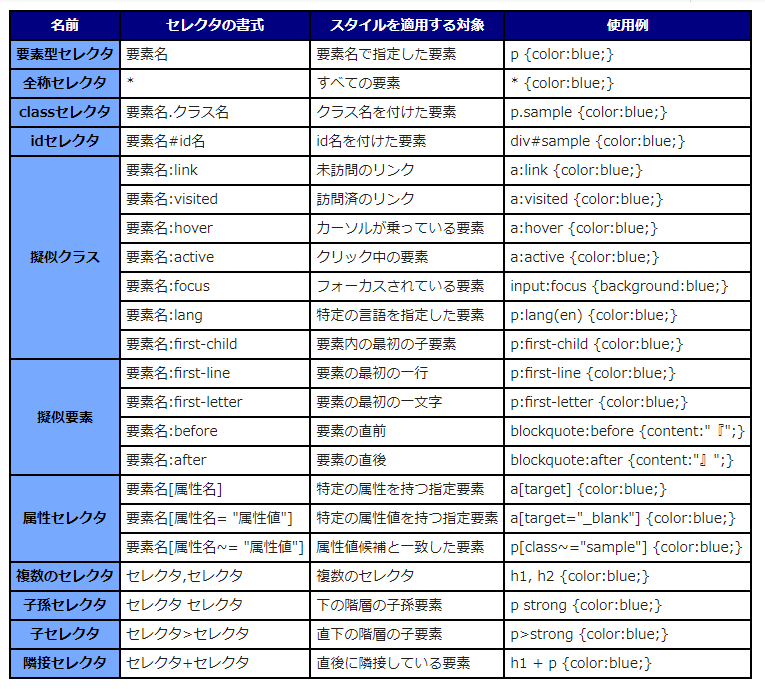



---



In [ ]:
%%HTML
<!-- 表の基本データ -->
<table>
<tbody>
<tr><th>名前</th><th>セレクタの書式</th><th>スタイルを適用する対象</th><th>使用例</th></tr>
<tr><th>要素型セレクタ</th><td>要素名</td><td> 要素名で指定した要素 </td><td>p {color:blue;}</td></tr>
<tr><th>全称セレクタ</th><td>*</td><td>すべての要素</td><td>* {color:blue;}</td></tr>
<tr><th>classセレクタ</th><td>要素名.クラス名</td><td>クラス名を付けた要素</td><td>p.sample {color:blue;}</td></tr>
<tr><th>idセレクタ</th><td>要素名#id名</td><td>id名を付けた要素</td><td>div#sample {color:blue;}</td></tr>
<tr><th rowspan="7">擬似クラス</th><td>要素名:link</td><td>未訪問のリンク</td><td>a:link {color:blue;}</td></tr>
<tr><td>要素名:visited</td><td>訪問済のリンク</td><td>a:visited {color:blue;}</td></tr>
<tr><td>要素名:hover</td><td>カーソルが乗っている要素</td><td>a:hover {color:blue;}</td></tr>
<tr><td>要素名:active</td><td>クリック中の要素</td><td>a:active {color:blue;}</td></tr>
<tr><td>要素名:focus</td><td>フォーカスされている要素</td><td>input:focus {background:blue;}</td></tr>
<tr><td>要素名:lang</td><td>特定の言語を指定した要素</td><td>p:lang(en) {color:blue;}</td></tr>
<tr><td>要素名:first-child</td><td>要素内の最初の子要素</td><td>p:first-child {color:blue;}</td></tr>
<tr><th rowspan="4">擬似要素</th><td>要素名:first-line</td><td>要素の最初の一行</td><td>p:first-line {color:blue;}</td></tr>
<tr><td>要素名:first-letter</td><td>要素の最初の一文字</td><td>p:first-letter {color:blue;}</td></tr>
<tr><td>要素名:before</td><td>要素の直前</td><td>blockquote:before {content:"『";}</td></tr>
<tr><td>要素名:after</td><td>要素の直後</td><td>blockquote:after {content:"』";}</td></tr>
<tr><th rowspan="3">属性セレクタ</th><td>要素名[属性名]</a></td><td>特定の属性を持つ指定要素</td><td>a[target] {color:blue;}</td></tr>
<tr><td>要素名[属性名= "属性値"]</td><td>特定の属性値を持つ指定要素</td><td>a[target="_blank"] {color:blue;}</td></tr>
<tr><td>要素名[属性名~= "属性値"]</td><td>属性値に特定の名前を含む要素</td><td>p[class~="sample"] {color:blue;}</td></tr>
<tr><th>複数のセレクタ</th><td>セレクタ,セレクタ</td><td>複数のセレクタ</td><td>h1, h2 {color:blue;}</td></tr>
<tr><th>子孫セレクタ</th><td>セレクタ セレクタ</td><td>下の階層の子孫要素</td><td>p strong {color:blue;}</td></tr>
<tr><th>子セレクタ</th><td>セレクタ&gt;セレクタ</a></td><td>直下の階層の子要素</td><td>p&gt;strong {color:blue;}</td></tr>
<tr><th>隣接セレクタ</th><td>セレクタ+セレクタ</td><td>直後に隣接している要素</td><td>h1 + p {color:blue;}</td></tr>
</tbody>
</table>

# 2-2 セレクタ
## セレクタの指定方法
これまではCSSのセレクタには基本的に要素名しか用いておりません（:first-childは紹介しいる）。これではCSSの修飾は要素単位でしか指定できないことになります。実はより細かく指定できるようなセレクタの指定方法が用意されています。また、HTMLでは要素に名前をつけることができます。HTMLではclass, id, nameといった属性で要素の名前指定をしますが、CSSで利用する属性はclassとidです。

HTMLのタグの中で、id="ID名", class="クラス名"といった属性を指定できます。その名前をCSSのセレクタ指定の中で利用することができます。idは特定の要素に唯一つけられる名前です。同じidをもつ要素は存在しないという唯一の要素を指定する名前です。一方classは複数箇所で使用できる名前です。同じクラス名がつけられた要素を同様に扱うといったことができます。

### IDを使ったセレクタ指定の例
■HTML：  
> `<p id="mono">アイディーを使った例</p>`

■スタイルシート：  
> `p#mono { color: red; }`

## クラスを用いたセレクタの記述の例
■HTML：  
> `<p class="sakura">クラスを使った例</p>`

■スタイルシート：  
> `p.sakura { color: red; }`  

セレクタでの使い方の違いは"#"と"."です。混在して使用することもできますし、同じ要素にIDとクラスを同時に指定することもできます。同じスタイルシート内で両者を同時に指定した場合は一般には後で記述したルールが優先しますが、IDとクラスではIDによる指定がクラスによる指定に優先します。

IDとクラスは要素名を修飾できますが、要素名を省略した場合すべての要素が対象となります。

## さまざなセレクタの修飾

CSS2のセレクタの修飾を表にしたものです。CSS3になって追加されておりますが、資料のまとめが間に合わなかったこともあり追って説明をします。セレクタの修飾は"#"や"."を使った修飾以外にも":"を使った疑似クラス、疑似要素という概念、さらには属性値で限定をする属性セレクタ、要素間の関係で限定する子孫セレクタ、子セレクタ、隣接セレクタといったものがあります。うまく利用することで、classによる名前付けを減らしてわかりやすくすることができます。

### セレクタの記述例
表の修飾の課題に使用したセレクタの記述の例です。詳細は説明できませんが、簡単な実験をしてみることでおおよそは理解できるかと思います。
<table class="kihon">
<tr class="kihonh"><th>名前</th><th>セレクタの書式</th><th>スタイルを適用する対象</th><th>使用例</th></tr>
<tr><th>要素型セレクタ</th><td>要素名</td><td> 要素名で指定した要素 </td><td>p {color:blue;}</td></tr>
<tr><th>全称セレクタ</th><td>*</td><td>すべての要素</td><td>* {color:blue;}</td></tr>
<tr><th>classセレクタ</th><td>要素名.クラス名</td><td>クラス名を付けた要素</td><td>p.sample {color:blue;}</td></tr>
<tr><th>idセレクタ</th><td>要素名#id名</td><td>id名を付けた要素</td><td>div#sample {color:blue;}</td></tr>
<tr><th rowspan="7">擬似クラス</th><td>要素名:link</td><td>未訪問のリンク</td><td>a:link {color:blue;}</td></tr>
<tr><td>要素名:visited</td><td>訪問済のリンク</td><td>a:visited {color:blue;}</td></tr>
<tr><td>要素名:hover</td><td>カーソルが乗っている要素</td><td>a:hover {color:blue;}</td></tr>
<tr><td>要素名:active</td><td>クリック中の要素</td><td>a:active {color:blue;}</td></tr>
<tr><td>要素名:focus</td><td>フォーカスされている要素</td><td>input:focus {background:blue;}</td></tr>
<tr><td>要素名:lang</td><td>特定の言語を指定した要素</td><td>p:lang(en) {color:blue;}</td></tr>
<tr><td>要素名:first-child</td><td>要素内の最初の子要素</td><td>p:first-child {color:blue;}</td></tr>
<tr><th rowspan="4">擬似要素</th><td>要素名:first-line</td><td>要素の最初の一行</td><td>p:first-line {color:blue;}</td></tr>
<tr><td>要素名:first-letter</td><td>要素の最初の一文字</td><td>p:first-letter {color:blue;}</td></tr>
<tr><td>要素名:before</td><td>要素の直前</td><td>blockquote:before {content:"『";}</td></tr>
<tr><td>要素名:after</td><td>要素の直後</td><td>blockquote:after {content:"』";}</td></tr>
<tr><th rowspan="3">属性セレクタ</th><td>要素名[属性名]</a></td><td>特定の属性を持つ指定要素</td><td>a[target] {color:blue;}</td></tr>
<tr><td>要素名[属性名= "属性値"]</td><td>特定の属性値を持つ指定要素</td><td>a[target="_blank"] {color:blue;}</td></tr>
<tr><td>要素名[属性名~= "属性値"]</td><td>属性値に特定の名前を含む要素</td><td>p[class~="sample"] {color:blue;}</td></tr>
<tr><th>複数のセレクタ</th><td>セレクタ,セレクタ</td><td>複数のセレクタ</td><td>h1, h2 {color:blue;}</td></tr>
<tr><th>子孫セレクタ</th><td>セレクタ セレクタ</td><td>下の階層の子孫要素</td><td>p strong {color:blue;}</td></tr>
<tr><th>子セレクタ</th><td>セレクタ&gt;セレクタ</a></td><td>直下の階層の子要素</td><td>p&gt;strong {color:blue;}</td></tr>
<tr><th>隣接セレクタ</th><td>セレクタ+セレクタ</td><td>直後に隣接している要素</td><td>h1 + p {color:blue;}</td></tr>
</table>

## 演習課題 2-2 セレクタ修飾の演習
以下のHTMLにCSS記述（style要素）を書き加え、その後の表示例に対応させてください。
ファイル名は，第8回Webコンテンツ制作演習_課題2.ipynbとすること

```
<h1 class="midashi" id="top">CSSのセレクタについて</h1>
<h2 class="midashi" class="sel_id">IDによる指定</h2>
<p class="sel_id">HTMLの要素にid属性で要素固有の名前をつけることができます。idに用いる名称は固有のものなので、HTMLファイルの中では唯一でなくてはいけません。idはHTMLの中の特定の要素を指定するために用います。</p>
<p class="sel_id">CSSのセレクタでidを利用する場合には、「要素名#id名」の形で指定をします。要素名を省略した場合はすべての要素が対象となります。</p>
<h2 class="midashi" class="sel_class">クラスによる指定</h2>
<p class="sel_class">HTMLの要素にclass属をつけることで、要素のクラス分けやグループ化をすることができます。idと異なり、class属性は同じファイル内であっても複数個所に指定することができ、同じ名前を付けたものに対して同一の指定をすることができます。</p>
<p class="sel_class">CSSのセレクタでclassを利用する場合には、「要素名.class名」の形で指定をします。要素名を省略した場合はやはりすべての要素が対象となります。</p>
<p>CSSからの利用の場合はidを使う必要は特に発生しません。1個所のみのclass指定も可能ですので、idを積極的に用いる理由はありません。idを利用する場面はCSSよりもJavaScriptプログラムから特定の要素を参照する場合に必要となります。CSSでidを用いる場合JavaScriptとの連携で使用されることが多いようです。</p>
<p class="caution"><strong>注意点：</strong>idとclassは混在可能ですが、idとclassではidが優先されます。同じCSSファイル内で指定では後に記述されたものが優先されますが、idとclassについては先に後でclass指定してもidによる指定が優先されます。</p>

```

>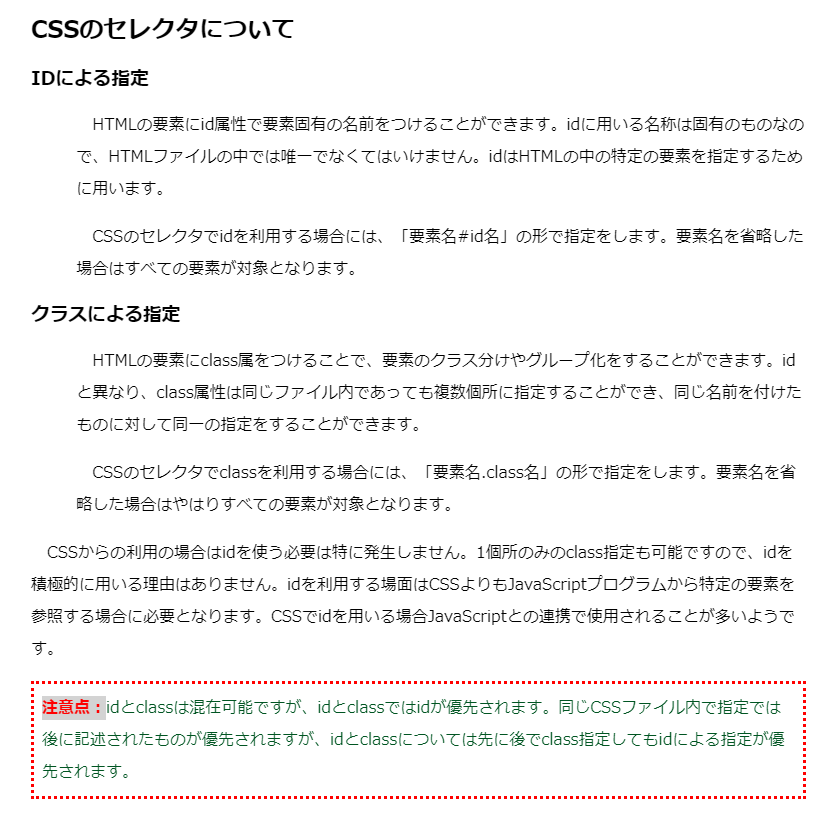

In [ ]:
%%HTML
<style>
/* クラスセレクタの使用例 */
h1 {
    /* フォントサイズを18pt */
}
h2 {
    /* フォントサイズを14pt */
}
p {
    /* フォントサイズを12pt */
    /* 最初のインデントを１文字分 */
    /* 行間を２文字分 */
}
p.sel_id, p.sel_class {  /* sel_idクラスのp要素とsel_classクラスのp要素
    /* 左マージン（margin-left）を12mm */
}
p:hover.sel_id {  /* sel_idクラスのp要素の上にマウスポインタがある時 */
    /* 色を紺色（navy）にする */
}
p:hover.sel_class {  /* sel_classクラスのp要素の上にマウスポインタがある時 */
    /* 色を濃緑色（darkgreen）にする */
}
p.caution {
    /* 最初の行のインデントなし */
    /* 文字の色は#005522にする */
    /* 枠線（border）を点線（dotted）で太さ3pxで色を赤 */
    /* 内側の余白（padding）を8px */
}
.caution strong {  /* cautionクラス内のstrong要素 */
    /* 色を赤（red）にする */
    /* 背景色（background-color）を薄い灰色（lightgray）にする */
}
</style>

<h1 class="midashi" id="top">CSSのセレクタについて</h1>
<h2 class="midashi" class="sel_id">IDによる指定</h2>
<p class="sel_id">HTMLの要素にid属性で要素固有の名前をつけることができます。idに用いる名称は固有のものなので、HTMLファイルの中では唯一でなくてはいけません。idはHTMLの中の特定の要素を指定するために用います。</p>
<p class="sel_id">CSSのセレクタでidを利用する場合には、「要素名#id名」の形で指定をします。要素名を省略した場合はすべての要素が対象となります。</p>
<h2 class="midashi" class="sel_class">クラスによる指定</h2>
<p class="sel_class">HTMLの要素にclass属をつけることで、要素のクラス分けやグループ化をすることができます。idと異なり、class属性は同じファイル内であっても複数個所に指定することができ、同じ名前を付けたものに対して同一の指定をすることができます。</p>
<p class="sel_class">CSSのセレクタでclassを利用する場合には、「要素名.class名」の形で指定をします。要素名を省略した場合はやはりすべての要素が対象となります。</p>
<p>CSSからの利用の場合はidを使う必要は特に発生しません。1個所のみのclass指定も可能ですので、idを積極的に用いる理由はありません。idを利用する場面はCSSよりもJavaScriptプログラムから特定の要素を参照する場合に必要となります。CSSでidを用いる場合JavaScriptとの連携で使用されることが多いようです。</p>
<p class="caution"><strong>注意点：</strong>idとclassは混在可能ですが、idとclassではidが優先されます。同じCSSファイル内で指定では後に記述されたものが優先されますが、idとclassについては先に後でclass指定してもidによる指定が優先されます。</p>




---



# 2-3 ページのレイアウトについて
WEBページのレイアウトはボックスを上から下へ並べていくの基本となっています。しかし、実際のWEBサイトでは画面は縦のみでなく横にボックスが並べられたり、またそれらを組み合わせたデザインがなされています。次は、ページ内のレイアウトの手段について学びます。

実は、ボックスの配置方法にはいろいろな手段や戦略があります。WEBページはワープロ文書のように大きさが固定されていません。さらに異なるデバイス（PC, タブレット、スマホ、テレビ、 ...）で参照されることも考慮しなくてはいけません。位置を絶対的な指定をして決めることが難しいので、さまざな状況で目的に合ったダイナミックな対応ができるよう、いろいろな手段が用意されているわけです。

## ページレイアウトの基本機能
ページレイアウトの基本はボックスの並べ方とその組み合わせです。ボックスは入れ子にできるので、ボックス内にボックスを並べる規則が記述できれば、その組み合わせで複雑な画面レイアウトができることになります。

ページのレイアウトの戦略は以下のような方法が基本機能として用意されています。
1. 表（Table）の機能を使う方法
1. ボックスの配置位置を指定する方法
1. 回り込み機能（float機能）使った横並びを駆使してレイアウトする方法
1. CSS3のFlexboxでレイアウトする方法
1. CSS3の段組み機能でレイアウトする方法

ほかにも合わせ技がいろいろあります。 4,5はCSS3になって導入された新しい方法ですが、マルチカラムによるレイアウトがたいへん簡単で行えます。

### 参考：要素の配置（表示）基本ルールの設定機能 display について（外部リンク）

https://developer.mozilla.org/ja/docs/Web/CSS/display

## レイアウト用の要素
段落を表す"p"や見出しの"h1" ~ "h6"などはブロックレベル要素です。このような要素を並べてページを表現するという話を前回しました。しかし、これらは文章のおける機能を表現するものであり、レイアウトやページの構造を表現するにはふさわしくありません。そこで、HTMLにはレイアウト用のブロックを表現する要素が用意されています。CSSによる修飾のための範囲を表現すると考えてもいいかと思います。

### div要素
\<div> ~ \</div>  

div要素には特に意味はありません。なんの意味も割り当てられていないブロックレベル要素です。classやidで名前をつければ、さまざな目的に利用できます。ただ、div要素には文書としての意味はありませんので、むやみやたらにHTMLの中で用いると意味不明な内容になります。自動生成するようなファイルやレイアウトの骨格となるHTML文書以外では利用に注意をしましょう。

divは意味をもたないブロックレベル要素ですが、文章内の装飾用に意味をもたないインライン要素としてspan要素があります。spanもCSSによる修飾が目的となります。

### (1) 表（Table） でレイアウトする
きれいに縦横にボックスを並べたい場合は表（ Table）を利用するのが素直です。イラストや写真を並べたい場合はtable要素を使うのが素直です。罫線を表示しなければ表を意識させない形でうまくグリッド配置ができます。HTML側でtable要素を使いたくない場合は同様の機能をブロックに割りつける。

 「display: table」という機能（指定）もあります。
表はセルを結合することができるので、セルで細かいグリッドを表現し、それを結合して領域を得ることで自由な配置を実現する手法がありますが、HTMLとCSS役割の分担と切り分けという点からはあまり推奨できる手法ではありません。表のセルを細分化する手法はHTML側でレイアウトを表現することになり、意味を読みとれるHTMLからは程遠いものになってしまいます。HTMLとCSSが分離された経緯を理解してください。

### (2) positionによる位置指定
ブロックは標準状態（position: static）ではtop, bottom, left, rightプロパティによる位置指定はできませんが、positionでモードを指定することで、位置を指定することができます。
#### **positionの値**
####**static**
>特に配置方法を指定しません。この値のときには、top、bottom、left、rightは適用されません。これが初期値です。

####**relative**
>本来配置されるべき位置からの相対位置への配置となります。positionプロパティでstaticを指定した場合に表示される位置が基準位置となります。
####**absolute**
>絶対位置への配置となります。親ボックスにpositionプロパティのstatic以外の値が指定されている場合には、親ボックスの左上が基準位置となります。親ボックスにpositionプロパティのstatic以外の値が指定されていない場合には、ウィンドウ全体の左上が基準位置となります。
####**fixed**
>絶対位置への配置となるのはabsoluteと同じですが、スクロールしても位置が固定されたままとなります。

### ボックスを４つ配置する例
divによるボックスを配置する例です。CSS(style要素）のposition指定を変更して表示（配置）を確認しなさい。

In [ ]:
%%HTML
<!-- boxを4つ並べる -->
<style>
.top {
  position: relative; /* 以下でposition: absoluteの時にコメントをはずしてみる */
}

.box {
  position: absolute;  /* ここを relative, absolute, fixed に変えてみる */
  height: 5cm;
  width: 5cm;
}

#b1 {
  left: 1cm; top: 1cm;
  background-color: aliceblue;
}
#b2 {
  left: 6cm; top: 1cm;
  background-color:deepskyblue;
}
#b3 {
  left: 1cm; top: 6cm;
  background-color: beige;
}
#b4 {
  left: 6cm; top: 6cm;
  background-color:chartreuse;
}
</style>

<h1>boxes</h1>
<div class="top">
  <div id="b1" class="box">１番目の箱</div>
  <div id="b2" class="box">２番目の箱</div>
  <div id="b3" class="box">３番目の箱</div>
  <div id="b4" class="box">４番目の箱</div>
</div>

### (3) floatによる回り込みによる横配置
floatプロパティは、指定された要素を左または右に寄せて配置する際に使用します。 後に続く内容は、その反対側に回り込みます。この機能は図表や写真の配置に利用されますが、この機能を利用することでボックスを横に配置していくことができます。なお、floatプロパティは、positionプロパティで static以外の値が指定されている要素には適用されません。

####**left**
>指定した要素を左に寄せます。後に続く内容はその右側に回り込みます。
####**right**
>指定した要素を右に寄せます。後に続く内容はその左側に回り込みます。
####**none**
>特に配置を指定しません。これが初期値です。

floatは本来ボックスを回り込む機能ですが、連続して指定をすることで横にボックスを並べていくことが可能です。

### floatによるボックス配置の例

In [ ]:
%%HTML
<!-- floatによる配置 -->
<style>
/* floatで左に回り込む指定を連続指定して横に配置するCSS */
.box {
  float: left;
  height: 5cm;
  width: 5cm;
}
/* boxの色の指定 */
#b1 {
  background-color: aliceblue;
}
#b2 {
  background-color:deepskyblue;
}
#b3 {
  background-color: beige;
}
#b4 {
  background-color:chartreuse;
}
</style>

<h1>boxes</h1>
<div class="top">
  <div id="b1" class="box">１番目の箱</div>
  <div id="b2" class="box">２番目の箱</div>
  <div id="b3" class="box">３番目の箱</div>
  <div id="b4" class="box">４番目の箱</div>
</div>

### floatを使って左右２段組にする例
セレクタの説明に使った例にdivで領域を指定しています。書く領域を幅の49%に設定することで、横に2つ配置されるように指定しています（50%では改行してしまうため）。

※ コードの後の出力例は画像データです。

In [ ]:
%%HTML
<style>
/* 2-2 の演習課題内容に加えて以下を加える */
.col {
  float: left;
  width: 49%;    /* 横2段に配置されるように50%より1%だけ減らしている */
}
body > p {       /* 回り込みの解除指定 */
  clear: left;
}
</style>

<h1 class="midashi" id="top">CSSのセレクタについて</h1>
<div class="col">
  <h2 class="midashi" class="sel_id">IDによる指定</h2>
  <p class="sel_id">HTMLの要素にid属性で要素固有の名前をつけることができます。idに用いる名称は固有のものなので、HTMLファイルの中では唯一でなくてはいけません。idはHTMLの中の特定の要素を指定するために用います。</p>
  <p class="sel_id">CSSのセレクタでidを利用する場合には、「要素名#id名」の形で指定をします。要素名を省略した場合はすべての要素が対象となります。</p>
</div>
<div class="col">
  <h2 class="midashi" class="sel_class">クラスによる指定</h2>
  <p class="sel_class">HTMLの要素にclass属をつけることで、要素のクラス分けやグループ化をすることができます。idと異なり、class属性は同じファイル内であっても複数個所に指定することができ、同じ名前を付けたものに対して同一の指定をすることができます。</p>
  <p class="sel_class">CSSのセレクタでclassを利用する場合には、「要素名.class名」の形で指定をします。要素名を省略した場合はやはりすべての要素が対象となります。</p>
</div>
<p>CSSからの利用の場合はidを使う必要は特に発生しません。1個所のみのclass指定も可能ですので、idを積極的に用いる理由はありません。idを利用する場面はCSSよりもJavaScriptプログラムから特定の要素を参照する場合に必要となります。CSSでidを用いる場合JavaScriptとの連携で使用されることが多いようです。</p>
<p class="caution"><strong>注意点：</strong>idとclassは混在可能ですが、idとclassではidが優先されます。同じCSSファイル内で指定では後に記述されたものが優先されますが、idとclassについては先に後でclass指定してもidによる指定が優先されます。</p>

>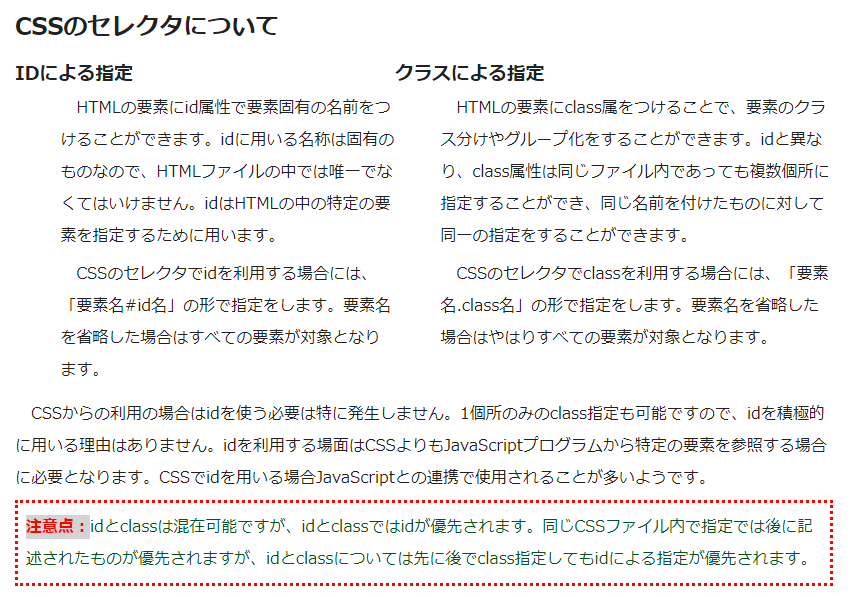

### (4) Flexboxによる並び表現
CSS3になって導入されたFlexboxを用いると縦や横の並びをたいへんわかりやすく、また細かく指定ができます。IE11などの古いブラウザでは動かない場合がると思いますが、最近のHTML5, CSS3対応のブラウザでは問題なく表示できるはずです。

Flexboxはさまざなバリエーションが簡単な設定で実現できます。Flexboxで検索をすればさまざまなパターンについての説明のサイトが出てきます。

### 参考：とりあえず見つかるFlexboxの解説サイト

1. https://coliss.com/articles/build-websites/operation/css/css3-flexbox-properties-by-scotch.html
1. https://developer.mozilla.org/ja/docs/Web/CSS/CSS_Flexible_Box_Layout/Using_CSS_flexible_boxes
1. https://webdesign-trends.net/entry/8148
1. https://www.webcreatorbox.com/tech/css-flexbox-cheat-sheet

### FlexboxのCSS例
以下のstyleの実験をしてみましょう
####flexboxを使った横並び基本
```
.top {
  display: flex;
}
```
####flexboxを使って3カラムで折り返す場合の例
```
.top {
  display: flex;
  flex-wrap: wrap;
}
p {
  width: 32%;
}
```
####flexboxで縦並びの場合の例
```
.top {
  display: flex;
  flex-wrap: wrap;
  flex-direction: column;
  justify-content: flex-start;
  height: 10cm;
}
p {
  width: 32%;
}
```

In [ ]:
%%HTML
<!-- styleの内容を置換えてみましょう -->
<style>
.top {
  display: flex;
}
p {
  border: dotted 1px red;
  margin: 5px;
}
</style>

<div class="top">
  <p>flexboxとは「Flexible Box Layout Module」のことで、CSSでのレイアウト設定を簡単にするレイアウトモジュールです。今までjavascript・jQueryで行っていたような複雑なレイアウトもとてもシンプルに設定できます。</p>
  <p>数年前まではflexboxをサポートしていないブラウザが多く使いづらかったのですが、現在ではほとんどのブラウザにサポートされています。</p>
  <p>それでは基本的な使い方からやっていきましょう。まず抑えるポイントは2つ、<strong>flexコンテナ</strong>と<strong>flexアイテム</strong>。</p>
  <p>flexコンテナは下記に記載するflexアイテムを内包する親要素です。flexアイテムの縦・横軸の位置や並び順、折り返しなどを簡単に指定できます。</p>
  <p>flexアイテムはflexコンテナ内に配置された子要素です。親要素がflexコンテナであれば自動でflexアイテムとして扱われます。</p>
  <p>flexboxではflexアイテム側のボックスではく、並べる入れ物であるflexコンテナ側で並び方の指定ができますので、配置する要素側では配置を意識する必要がほとんどありません。CSSもたいへん見通しのよいものになります。</p>
</div>

### (5) 段組み機能でレイアウトする方法
ページ内で多段組を利用したいという目的であるならば、CSS3ではまさに段組み機能が組み込まれています。この機能はボックス単位ではなくボックス内で段組みに従って文章の流し込みができます。

FlexboxのCSSを以下に置き換えてください。さらに簡単です。
#### multicol.css（3段組み）
```
.top {
  column-count: 3;
}
```
#### multicol.css（1カラム15文字で段組み）
```
.top {
  column-width: 15em;
}
```

In [ ]:
%%HTML
<!-- styleの内容を置換えてみましょう -->
<style>
.top {
  column-count: 3;
}
</style>

<div class="top">
  <p>flexboxとは「Flexible Box Layout Module」のことで、CSSでのレイアウト設定を簡単にするレイアウトモジュールです。今までjavascript・jQueryで行っていたような複雑なレイアウトもとてもシンプルに設定できます。</p>
  <p>数年前まではflexboxをサポートしていないブラウザが多く使いづらかったのですが、現在（2018年5月現在）ではほとんどのブラウザにサポートされています。</p>
  <p>それでは基本的な使い方からやっていきましょう。まず抑えるポイントは2つ、<strong>flexコンテナ</strong>と<strong>flexアイテム</strong>。</p>
  <p>flexコンテナは下記に記載するflexアイテムを内包する親要素です。flexアイテムの縦・横軸の位置や並び順、折り返しなどを簡単に指定できます</p>
  <p>flexアイテムはflexコンテナ内に配置された子要素です。親要素がflexコンテナであれば自動でflexアイテムとして扱われます。</p>
  <p>flexboxではflexアイテム側のボックスではく、並べる入れ物であるflexコンテナ側で並び方の指定ができますので、配置する要素側では配置を意識する必要がほとんどありません。CSSもたいへん見通しのよいものになります。</p>
</div>

## 演習課題 2-3
floatを使って左右2段組みにする例を前に示しておりますが、それをflexboxを使って実現してみてください。

以下のコードに対応するCSS（style要素）を書き加えてください。

ファイル名は，第8回Webコンテンツ制作演習_課題3.ipynbとすること

In [ ]:
%%HTML
<h1 class="midashi" id="top">CSSのセレクタについて</h1>
<div class="fbox">
  <div>
    <h2 class="midashi" class="sel_id">IDによる指定</h2>
    <p class="sel_id">HTMLの要素にid属性で要素固有の名前をつけることができます。idに用いる名称は固有のものなので、HTMLファイルの中では唯一でなくてはいけません。idはHTMLの中の特定の要素を指定するために用います。</p>
    <p class="sel_id">CSSのセレクタでidを利用する場合には、「要素名#id名」の形で指定をします。要素名を省略した場合はすべての要素が対象となります。</p>
  </div>
  <div>
    <h2 class="midashi" class="sel_class">クラスによる指定</h2>
    <p class="sel_class">HTMLの要素にclass属をつけることで、要素のクラス分けやグループ化をすることができます。idと異なり、class属性は同じファイル内であっても複数個所に指定することができ、同じ名前を付けたものに対して同一の指定をすることができます。</p>
    <p class="sel_class">CSSのセレクタでclassを利用する場合には、「要素名.class名」の形で指定をします。要素名を省略した場合はやはりすべての要素が対象となります。</p>
  </div>
</div>
<p>CSSからの利用の場合はidを使う必要は特に発生しません。1個所のみのclass指定も可能ですので、idを積極的に用いる理由はありません。idを利用する場面はCSSよりもJavaScriptプログラムから特定の要素を参照する場合に必要となります。CSSでidを用いる場合JavaScriptとの連携で使用されることが多いようです。</p>
<p class="caution"><strong>注意点：</strong>idとclassは混在可能ですが、idとclassではidが優先されます。同じCSSファイル内で指定では後に記述されたものが優先されますが、idとclassについては先に後でclass指定してもidによる指定が優先されます。</p>